<a href="https://colab.research.google.com/github/SaamarthMeston/Capstone-Project-4-Online-Retail-/blob/main/Capstone_Project_4(Online_Retail).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Online Retail Customer Segmentation**

## **Project Summery**



In this project we Recieved a csv file containing Data related to Transactions  called Online Retail.xlsx - Online Retail.csv.

RFM analysis is a marketing technique used to quantitatively rank and group customers based on the recency, frequency and monetary total of their recent transactions to identify the best customers and perform targeted marketing campaigns.

This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

****
In this Project we Learnt that-

* This data Set contains 541909 Recordes of 4373 Customers.

* There are 135080 Missing values in CustomerID column and 1454 in Description column.

* Percentage of customers who have not regestered with the store is 25.53 %

* 9288 Orders were cancelled.

* **Top 5 Selling:**


> 1. WHITE HANGING HEART T-LIGHT HOLDER
2. REGENCY CAKESTAND 3 TIER
3. JUMBO BAG RED RETROSPOT
4. ASSORTED COLOUR BIRD ORNAMENT
5. PARTY BUNTING


**Least selling:**
>1. PAPER CRAFT , LITTLE BIRDIE
2. WALL ART , THE MAGIC FOREST
3. 72 CAKE CASES VINTAGE CHRISTMAS
4. PINK CHRYSANTHEMUMS ART FLOWER
5. RUBY GLASS CLUSTER EARRINGS

 **Top 5 countries:**

>1. United Kingdom
2. Germany
3. France
4. EIRE
5. Spain
****
**RFM Analysis**

*  The Most Common RFM_Score is 7 with 322 Contributing the most
555 is the Most Common Group


* Best Customers:  306
* Loyal Customers:  862
* Recent Customers:  861
* Big Spenders:  868
* Almost Lost:  88
* Lost Customers:  8
* Lost Cheap Customers:  269

****
**Segmentation**

**K-Means Clustering with 3 Clusters( silhoutte score = 0.357)**

>* Group 0 -Lost Customer (Customer who haven't made any purchase for a long time)
* Group 1 - Loyal Customers (Cutomers who frequently make purchases from the company and generaly buy the big ticket items)
* group 2 - Drifting Customers (Customers who moderatly make a purchase from the store)

**Hierarchical Clustering with 2 Clusters ( silhoutte score = 0.419)**

>* Group 0 -Are customers with Low rececny High frequency and High Monetray. (These are value customers, they are very frequent and have
* Group 1 - Are customers with High rececny low frequency and low Monetray value. (these are lost customers which havent been active for a long time these contributers are not frequent and dont contributed much monetarly)


## **Git Hub Link**

https://github.com/SaamarthMeston/Capstone-Project-4-Online-Retail-

## **Problem Statement**

We aim to segement the Customers based on RFM so that the company can target its customers efficiently.

**Data Discription**

Abstract: A real online retail transaction data set of two years.

Data Set Information:
This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

Attribute Information:
* InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
* StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal.
* Quantity: The quantities of each product (item) per transaction. Numeric.
* InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.
* UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).
* CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
* Country: Country name. Nominal. The name of the country where a customer resides

# **Importing Libraries**

In [ ]:
#  importing libraries for data manupulation and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading DataSet**

In [ ]:
# Loading the dataset
Retail = pd.read_csv('/content/drive/MyDrive/Capstone Project 4(Online Retail)/Online Retail.xlsx - Online Retail.csv')

# **Data Exploration**

In [ ]:
# first five rows of the dataset
Retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
# Dataset Info
Retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# Shape of the dataset
Retail.shape

(541909, 8)

In [ ]:
#Description of the data
Retail.describe(include= 'all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/11 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [ ]:
#Number of Unique Customers
print(len(Retail.CustomerID.unique()))
print('\n')
print(len(Retail.InvoiceNo.unique()))

4373


25900


In [ ]:
# Total Null values
Retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## **Data PreProcessing/ Cleaning / Wrangling**

In [ ]:
# Changing datatype
Retail['InvoiceNo'] = Retail['InvoiceNo'].astype('str')
Retail['InvoiceDate'] = pd.to_datetime(Retail['InvoiceDate'], format = '%m/%d/%y %H:%M')

In [ ]:
# Dropping Cancelled Orders
Retail.drop(Retail[Retail['InvoiceNo'].str.contains('C')].index, axis = 0, inplace = True)

In [ ]:
# Shape of dataset after dropping cancelled orders.
Retail.shape

(527390, 8)

9288 Rows were deleted (Cancelled Orders)

In [ ]:
Retail=Retail.drop_duplicates()

In [ ]:
Retail.shape


(527390, 8)

5231 Duplicate enteries deleted

In [ ]:
print("Percentage of customers missing: ", round(Retail['CustomerID'].isnull().sum() * 100 / len(Retail),2),"%" )

Percentage of customers missing:  25.53 %


# **Exploratory Data Analysis**

## **5 Most and Least selling Products**

In [ ]:
# creating a dataframe for Discription and its count
Des_df = Retail['Description'].value_counts().reset_index()
Des_df.rename(columns={'index': 'Description_Name','Description': 'Count'}, inplace=True)
# first five rows of the dataset
Des_df.head()

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2315
1,JUMBO BAG RED RETROSPOT,2112
2,REGENCY CAKESTAND 3 TIER,2009
3,PARTY BUNTING,1700
4,LUNCH BAG RED RETROSPOT,1581


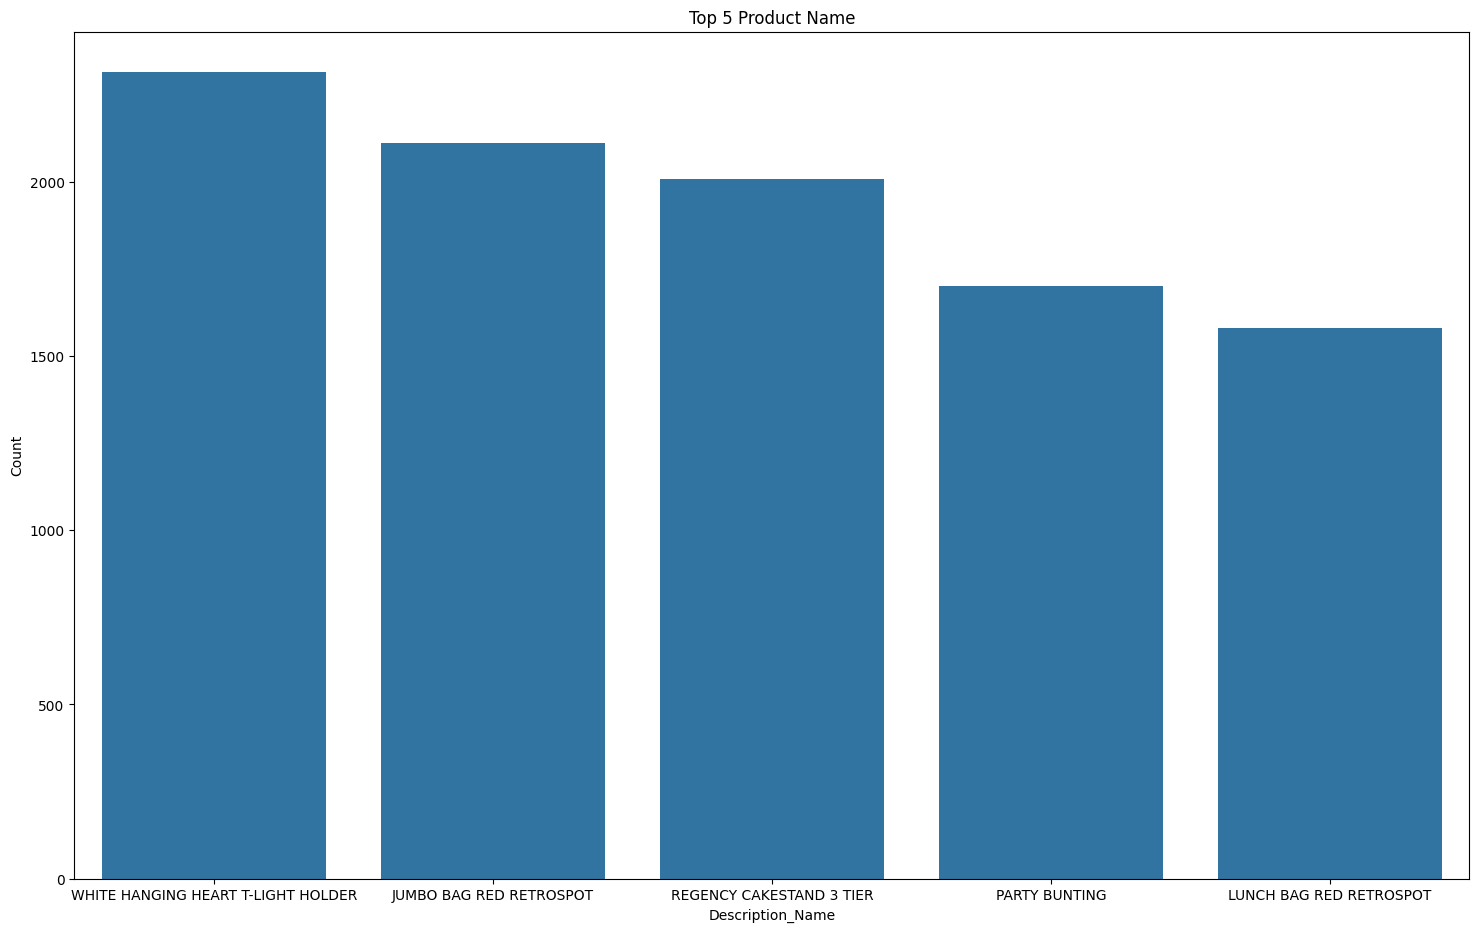

In [ ]:
plt.figure(figsize=(18,11))
plt.title('Top 5 Product Name')
sns.barplot(x='Description_Name',y='Count',data = Des_df[:5])
plt.show()

**Top 5 Selling:**
1. WHITE HANGING HEART T-LIGHT HOLDER
2. REGENCY CAKESTAND 3 TIER
3. JUMBO BAG RED RETROSPOT
4. ASSORTED COLOUR BIRD ORNAMENT
5. PARTY BUNTING





In [ ]:
# last five rows of the dataset
Des_df.tail()

,Description_Name,Count
4202,TINY CRYSTAL BRACELET RED,1
4203,4 GOLD FLOCK CHRISTMAS BALLS,1
4204,ZINC STAR T-LIGHT HOLDER,1
4205,BLUE GINGHAM ROSE CUSHION COVER,1
4206,"PAPER CRAFT , LITTLE BIRDIE",1


**Least selling:**
1. PAPER CRAFT , LITTLE BIRDIE
2. WALL ART , THE MAGIC FOREST
3. 72 CAKE CASES VINTAGE CHRISTMAS
4. PINK CHRYSANTHEMUMS ART FLOWER
5. RUBY GLASS CLUSTER EARRINGS

## **Country Analysis.**

In [ ]:
# creating a dataframe for Country and its count
country_df = Retail['Country'].value_counts().reset_index()
country_df.rename(columns={'index': 'Country','Country': 'Count'}, inplace=True)
# first five rows of the dataset
country_df.head()

,Country,Count
0,United Kingdom,482479
1,Germany,9027
2,France,8393
3,EIRE,7883
4,Spain,2480


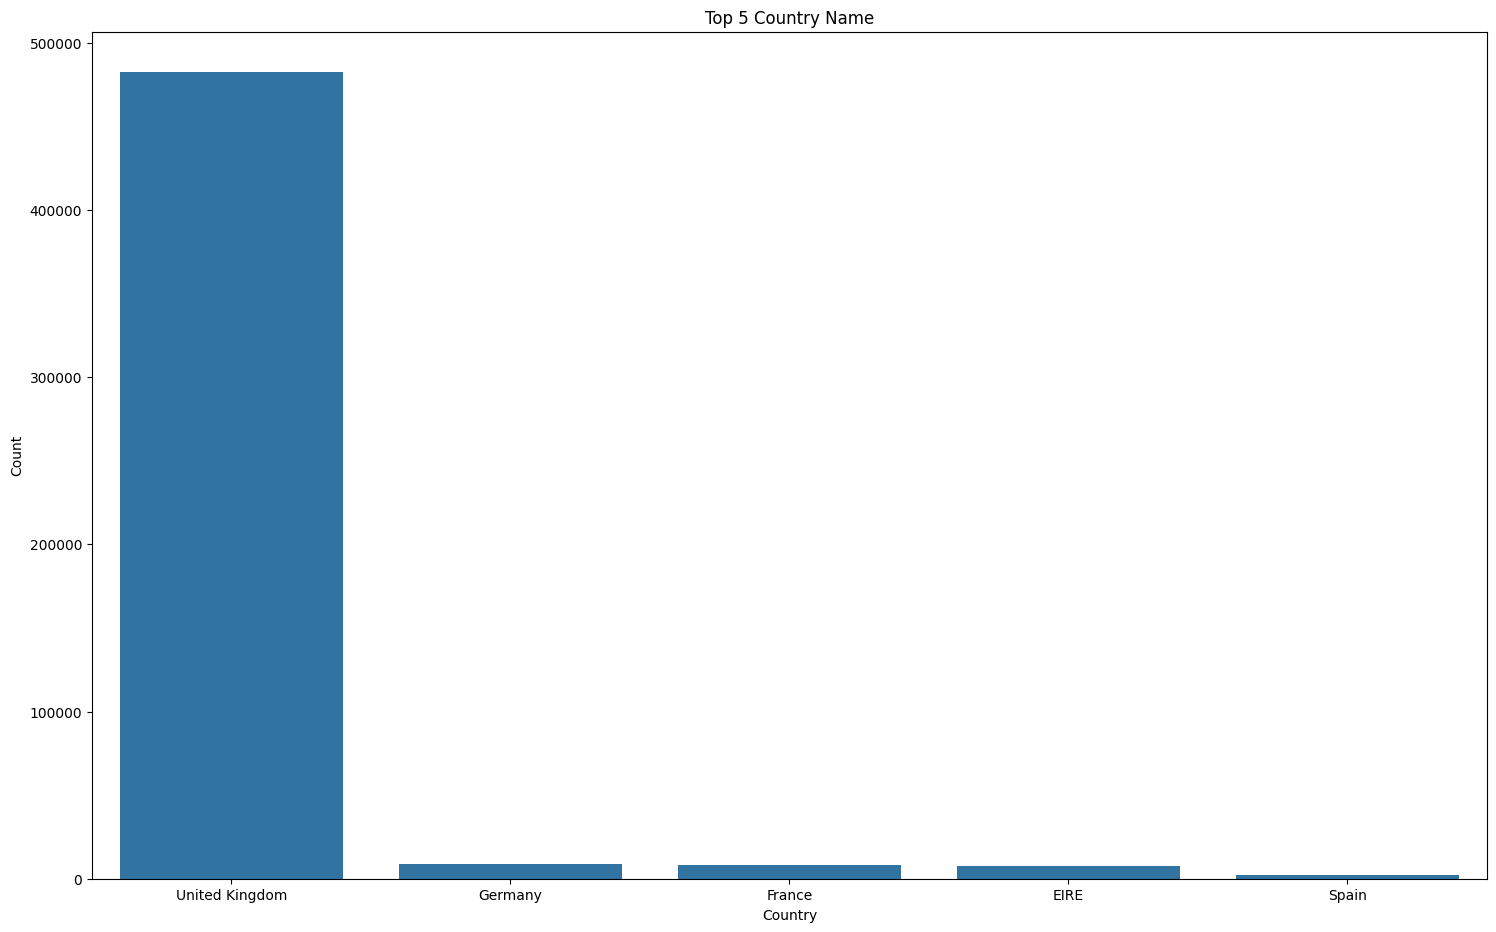

In [ ]:
plt.figure(figsize=(18,11))
plt.title('Top 5 Country Name')
sns.barplot(x='Country',y='Count',data = country_df[:5])
plt.show()

**Top 5 countries:**
1. United Kingdom
2. Germany
3. France
4. EIRE
5. Spain

# **RFM Ananlysis**

## Feature Engineering


In [ ]:
Retail_Working_RFM = Retail.copy()

### Feature Creation

#### Monetary

In [ ]:
# Monitary
Retail_Working_RFM['Amount'] = Retail_Working_RFM['UnitPrice']*Retail_Working_RFM['Quantity']
Monitary_df = Retail_Working_RFM.groupby('CustomerID')['Amount'].sum().reset_index()
Monitary_df.columns = ['CustomerID','Monetary']
Monitary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


#### Frequency

In [ ]:
# Frequency
Frequency_df = Retail_Working_RFM.groupby('CustomerID')['InvoiceNo'].count().reset_index()
Frequency_df.columns = ['CustomerID','Frequency']
Frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


#### Recency

In [ ]:
import datetime as dt

In [ ]:
# initializing the last Data of of the DataSet from hwich all the other dates will be refered
Refrence_Date = dt.datetime(2011,12,10)

In [ ]:
# creating last column which contains the days the customer last placed order from the Reference date
Retail_Working_RFM['last'] = Refrence_Date - Retail_Working_RFM['InvoiceDate']

In [ ]:
# Recency
Recency_df = Retail_Working_RFM.groupby('CustomerID')['last'].min()
Recency_df = Recency_df.reset_index()
Recency_df.columns = ['CustomerID','Recency']
# top five rows of recency dataframe
Recency_df.head()

,CustomerID,Recency
0,12346.0,325 days 13:59:00
1,12347.0,2 days 08:08:00
2,12348.0,75 days 10:47:00
3,12349.0,18 days 14:09:00
4,12350.0,310 days 07:59:00


In [ ]:
# using dates only
Recency_df['Recency'] = Recency_df['Recency'].dt.days

In [ ]:
# top five rows of recency dataframe
Recency_df.head()

,CustomerID,Recency
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


In [ ]:
# Merging the Monetray, Frequency and Recency dataframes to form RFM Dataframe
RFM_DF = pd.merge(pd.merge(Recency_df,Frequency_df, on= 'CustomerID', how= 'inner'),Monitary_df, on='CustomerID', how ='inner')

In [ ]:
# first five rows of the dataset
RFM_DF.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


#### Scoring

In [ ]:
# creating aa copy of RFM dataframe for futher analysis
RFM_DF_Segmented = RFM_DF.copy()

In [ ]:
# Defining The RFM dataset in quartiles
Quantiles = RFM_DF_Segmented[['Recency','Frequency','Monetary']].quantile(q = [0.2, 0.4, 0.6, 0.8])
Quantiles

,Recency,Frequency,Monetary
0.2,13.2,14.0,248.844
0.4,32.0,29.0,487.118
0.6,71.0,57.0,933.202
0.8,179.0,120.0,2054.820


In [ ]:
Quantiles = Quantiles.to_dict()

In [ ]:
Quantiles

{'Recency': {0.2: 13.200000000000045, 0.4: 32.0, 0.6: 71.0, 0.8: 179.0},
 'Frequency': {0.2: 14.0, 0.4: 29.0, 0.6: 57.0, 0.8: 120.0},
 'Monetary': {0.2: 248.84400000000002,
  0.4: 487.118,
  0.6: 933.2019999999999,
  0.8: 2054.82}}

Binning

In [ ]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def Small_to_Big_Scoring(x,p,d):
    if x <= d[p][0.2]:
        return 1
    elif x <= d[p][0.40]:
        return 2
    elif x <= d[p][0.6]:
        return 3
    elif x <= d[p][0.8]:
        return 4
    else:
        return 5

# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def Big_to_Small_Scoring(x,p,d):
    if x <= d[p][0.2]:
        return 5
    elif x <= d[p][0.4]:
        return 4
    elif x <= d[p][0.6]:
        return 3
    elif x <= d[p][0.8]:
        return 2
    else:
        return 1

In [ ]:
# Applying The above defined functions on the Recency, Frequency and Monetray
RFM_DF_Segmented['R_Score'] = RFM_DF_Segmented['Recency'].apply(Big_to_Small_Scoring, args=('Recency',Quantiles,))
RFM_DF_Segmented['F_Score'] = RFM_DF_Segmented['Frequency'].apply(Small_to_Big_Scoring, args=('Frequency',Quantiles,))
RFM_DF_Segmented['M_Score'] = RFM_DF_Segmented['Monetary'].apply(Small_to_Big_Scoring, args=('Monetary',Quantiles,))

In [ ]:
# Foriming Group based on R,F,M score
RFM_DF_Segmented['RFM_Group'] = RFM_DF_Segmented.R_Score.map(str)+ RFM_DF_Segmented.F_Score.map(str)+ RFM_DF_Segmented.M_Score.map(str)

In [ ]:
# creating RFM score by adding indevidual score
RFM_DF_Segmented['RFM_Score'] = RFM_DF_Segmented[['R_Score','F_Score','M_Score']].sum(axis = 1)

In [ ]:
# first five rows of the dataset
RFM_DF_Segmented.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Group,RFM_Score
0,12346.0,325,1,77183.60,1,1,5,115,7
1,12347.0,2,182,4310.00,5,5,5,555,15
2,12348.0,75,31,1797.24,2,3,4,234,9
3,12349.0,18,73,1757.55,4,4,4,444,12
4,12350.0,310,17,334.40,1,2,2,122,5


Text(0.5, 1.0, 'Sex Distribution')

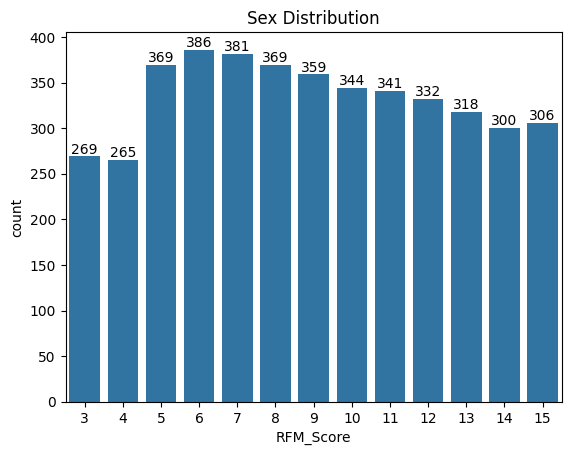

In [ ]:
ax =sns.countplot(RFM_DF_Segmented,x = "RFM_Score")
for label in ax.containers:
    ax.bar_label(label)
plt.title('Sex Distribution')

In [ ]:
# How the RFM_Score is devided into RFM_Groups
RFM_DF_Segmented['RFM_Group'][RFM_DF_Segmented.RFM_Score == 7].value_counts()

322    89
133    52
223    48
511    35
331    30
232    26
412    23
421    21
142    17
214    13
313    13
124     6
115     5
241     3
Name: RFM_Group, dtype: int64

In [ ]:
# creating data frame for RFM groups
Group_df = RFM_DF_Segmented['RFM_Group'].value_counts().reset_index()
Group_df.rename(columns={'index': 'Group','RFM_Group': 'Count'}, inplace=True)
Group_df.T

,0,1,2,3,4,5,6,7,8,9,...,108,109,110,111,112,113,114,115,116,117
Group,555,111,455,122,211,444,233,222,333,544,...,514,541,135,352,314,415,425,552,152,125
Count,306,269,164,149,127,122,107,95,94,92,...,2,2,2,2,2,2,2,1,1,1


**The Most Common RFM_Score is 7 with 322 Contributing the most 555 is the Most Common Group**

In [ ]:
print("Best Customers: ",len(RFM_DF_Segmented[RFM_DF_Segmented['RFM_Group']=='555']))
print('Loyal Customers: ',len(RFM_DF_Segmented[RFM_DF_Segmented['F_Score']==5]))
print('Recent Customers: ',len(RFM_DF_Segmented[RFM_DF_Segmented['R_Score']==1]))
print("Big Spenders: ",len(RFM_DF_Segmented[RFM_DF_Segmented['M_Score']==5]))
print('Almost Lost: ', len(RFM_DF_Segmented[RFM_DF_Segmented['RFM_Group']=='355']))
print('Lost Customers: ',len(RFM_DF_Segmented[RFM_DF_Segmented['RFM_Group']=='155']))
print('Lost Cheap Customers: ',len(RFM_DF_Segmented[RFM_DF_Segmented['RFM_Group']=='111']))

Best Customers:  306
Loyal Customers:  862
Recent Customers:  861
Big Spenders:  868
Almost Lost:  88
Lost Customers:  8
Lost Cheap Customers:  269


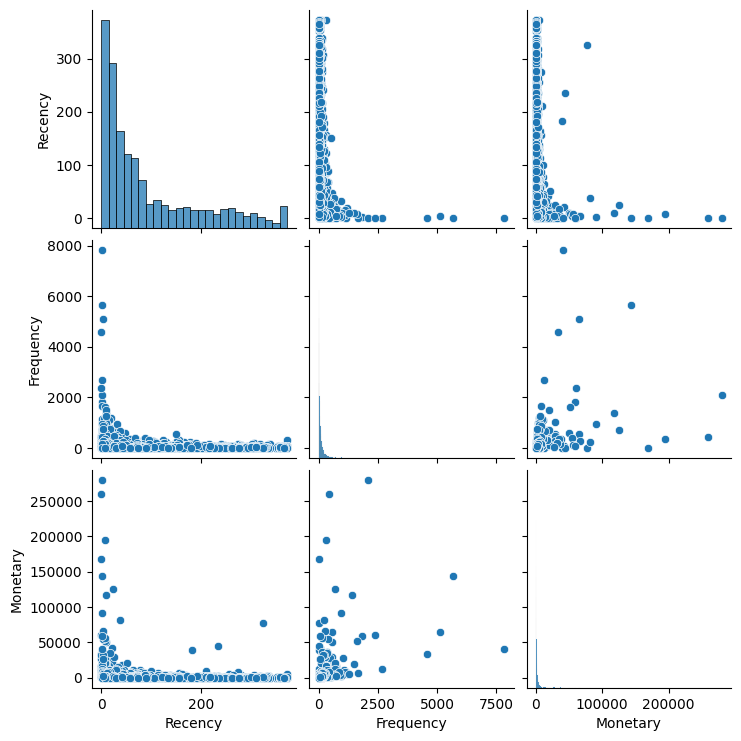

In [ ]:
sns.pairplot(RFM_DF_Segmented[['Recency','Frequency','Monetary']])

### Handling Skewness

In [ ]:
RFM_modeling_Df=RFM_DF_Segmented[['Recency','Frequency','Monetary']].copy()

In [ ]:
# Skewness of R,F,M
RFM_modeling_Df.skew()

Recency       1.246137
Frequency    18.043619
Monetary     19.341403
dtype: float64

The Columns are postively or right skwed.
All Columns dont have a negitive value but Recency and Monetray has 0 in their values.

we can go with log transform, box cox or with yeo-johnson.

we will be going with yeo-johnson as it can handel negitive and 0 values while the other two cant.

In [ ]:
features = RFM_modeling_Df.columns

In [ ]:
# Importig power transform from Sciketlearn
from sklearn.preprocessing import PowerTransformer

In [ ]:
# standardized = True, method = yeo-johnson
PT = PowerTransformer()

In [ ]:
# fitting the model
RFM_modeling_Df = PT.fit_transform(RFM_modeling_Df)

In [ ]:
# Creating the dataframe
RFM_modeling = pd.DataFrame(data = RFM_modeling_Df, columns =features)

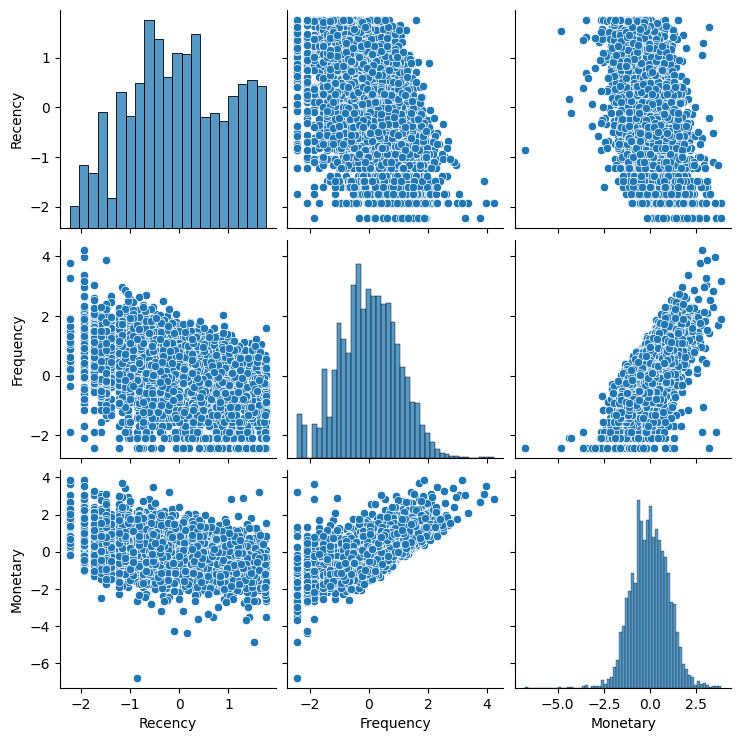

In [ ]:
sns.pairplot(RFM_modeling)

In [ ]:
# Skewness of R,F,M
RFM_modeling.skew()

Recency     -0.063294
Frequency   -0.000070
Monetary    -0.022784
dtype: float64

### Scaling

In [ ]:
# importing minmax scaler from sciketlearn
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# creating an instance of minmaxscaler
MandM = MinMaxScaler(feature_range=(-1, 1))

In [ ]:
# fitting and transforming the data
RFM_modeling = MandM.fit_transform(RFM_modeling)

In [ ]:
# creating a dataframe
RFM_modeling = pd.DataFrame(data = RFM_modeling, columns = features )

In [ ]:
RFM_modeling.describe()

,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000
mean,0.116532,-0.270796,0.272108
std,0.501652,0.300692,0.187675
min,-1.000000,-1.000000,-1.000000
25%,-0.253646,-0.473463,0.148011
50%,0.110767,-0.269274,0.268981
75%,0.534315,-0.061987,0.401489
max,1.000000,1.000000,1.000000


# **RFM Segmentation**

## Modeling

We'll be using K-means, DBscan and hierarchical clustering.
And we will be using silhouette score.

In [ ]:
# importing models and metrices from sciketlearn
from sklearn.cluster import KMeans, DBSCAN , AgglomerativeClustering
from sklearn.metrics import silhouette_score

### KMeans

In [ ]:
inertia = []
Num_cluster = range(2,20)
for i in Num_cluster:
  clusters = KMeans(n_clusters= i, init = 'k-means++' , max_iter= 1000, random_state= 77)
  # Fitting the input data
  clusters.fit(RFM_modeling)
  inertia.append( clusters.inertia_ )   # capture the intertia

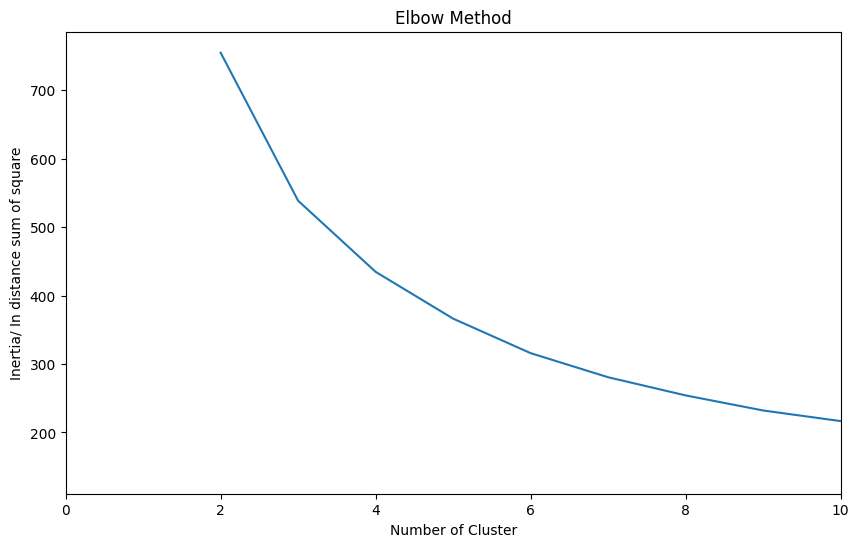

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(2,20),inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Cluster')
plt.xlim(0,10)
plt.ylabel('Inertia/ In distance sum of square')
plt.show()

In [ ]:
Num_cluster = range(2,10)
for i in Num_cluster:
  clusters = KMeans(n_clusters= i, init = 'k-means++' , max_iter= 1000, random_state= 77)
  # Fitting the input data
  clusters.fit(RFM_modeling)
  # Getting the cluster labels
  cluster_labels = clusters.labels_       # capture the cluster lables
  silhouette_avg = silhouette_score(RFM_modeling, cluster_labels)
  print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4371640296382769
For n_clusters=3, the silhouette score is 0.35780270088786176
For n_clusters=4, the silhouette score is 0.35296017022244275
For n_clusters=5, the silhouette score is 0.3166881780256892
For n_clusters=6, the silhouette score is 0.31910856296907575
For n_clusters=7, the silhouette score is 0.29306310483042913
For n_clusters=8, the silhouette score is 0.2945204774051652
For n_clusters=9, the silhouette score is 0.2918582370323786


We used Elbow Method to find the number of clusters.
* Elbow at 3, Number of clusters is 3

In [ ]:
KMC = KMeans(n_clusters = 3,init = "k-means++", max_iter= 1000, random_state=77)
# Fitting the input data
KMC.fit(RFM_modeling)
# pridicting the clusters
Cluster_k = KMC.predict(RFM_modeling)

In [ ]:
silhouette_score(RFM_modeling,Cluster_k)

0.35780270088786176

In [ ]:
Kmeans_df = pd.DataFrame(data= RFM_DF, columns = ['Recency','Frequency','Monetary'])
Kmeans_df['Group'] = Cluster_k
Kmeans_df.head()

,Recency,Frequency,Monetary,Group
0,325,1,77183.60,0
1,2,182,4310.00,1
2,75,31,1797.24,2
3,18,73,1757.55,1
4,310,17,334.40,0


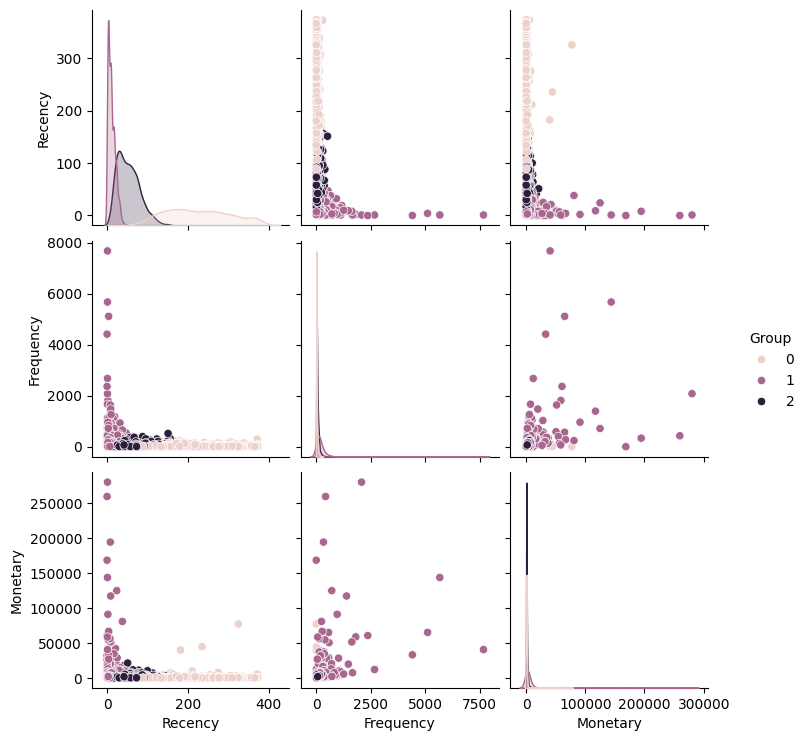

In [ ]:
sns.pairplot(Kmeans_df,hue= 'Group')

In [ ]:
fig = px.scatter_3d(Kmeans_df, x = 'Recency' ,y =  'Frequency',z = 'Monetary',
              color='Group')
fig.show()

<Axes: xlabel='Group', ylabel='Recency'>

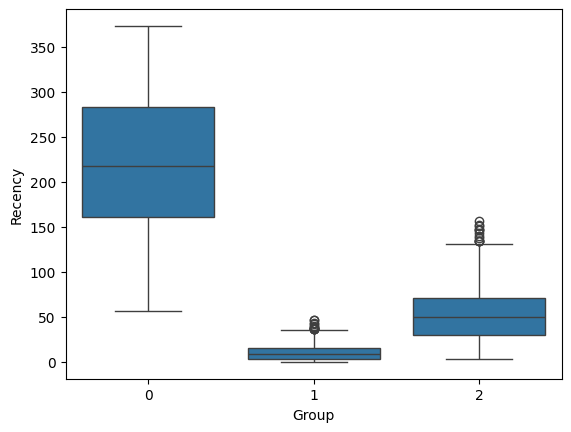

In [ ]:
sns.boxplot(y = Kmeans_df['Recency'] ,x = Kmeans_df['Group'])

(0.0, 1000.0)

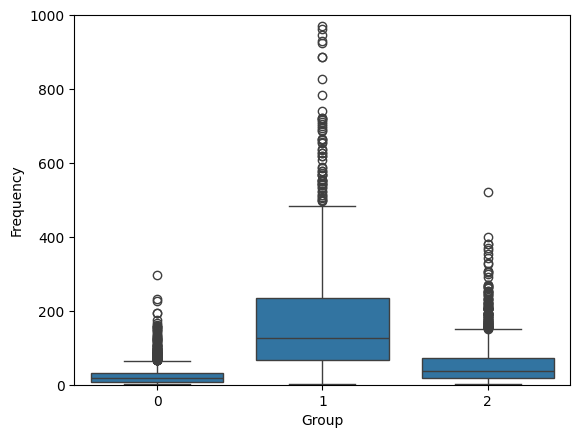

In [ ]:
sns.boxplot(y = Kmeans_df['Frequency'] ,x = Kmeans_df['Group'])
plt.ylim(0,1000)

(0.0, 15000.0)

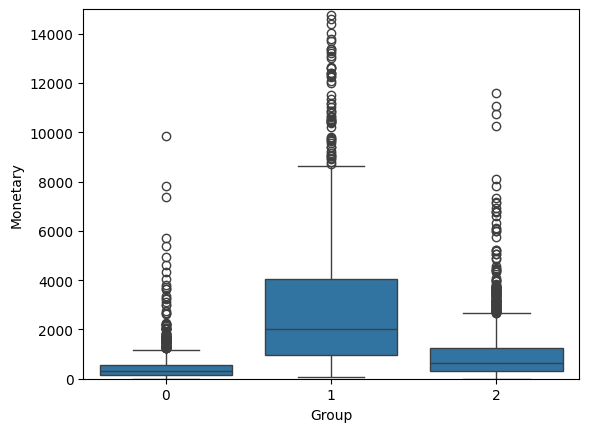

In [ ]:
sns.boxplot(y = Kmeans_df['Monetary'] ,x = Kmeans_df['Group'])
plt.ylim(0,15000)

* Group 0 -Lost Customer (Customer who haven't made any purchase for a long time)
* Group 1 - Loyal Customers (Cutomers who frequently make purchases from the company and generaly buy the big ticket items)
* group 2 - Drifting Customers (Customers who moderatly make a purchase from the store)

### Hierarchical Clustering(AgglomerativeClustering)

In [ ]:
# importing hierarchy from scipy to visualize hierarchy.
from scipy.cluster.hierarchy import linkage, dendrogram

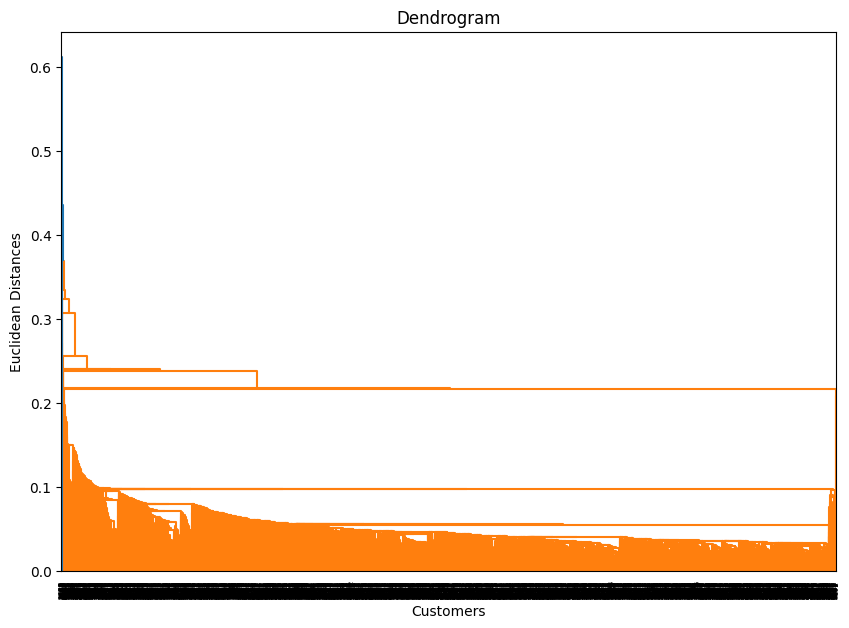

In [ ]:
plt.figure(figsize = (10,7))
dendrogram(linkage(RFM_modeling, method = 'single'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

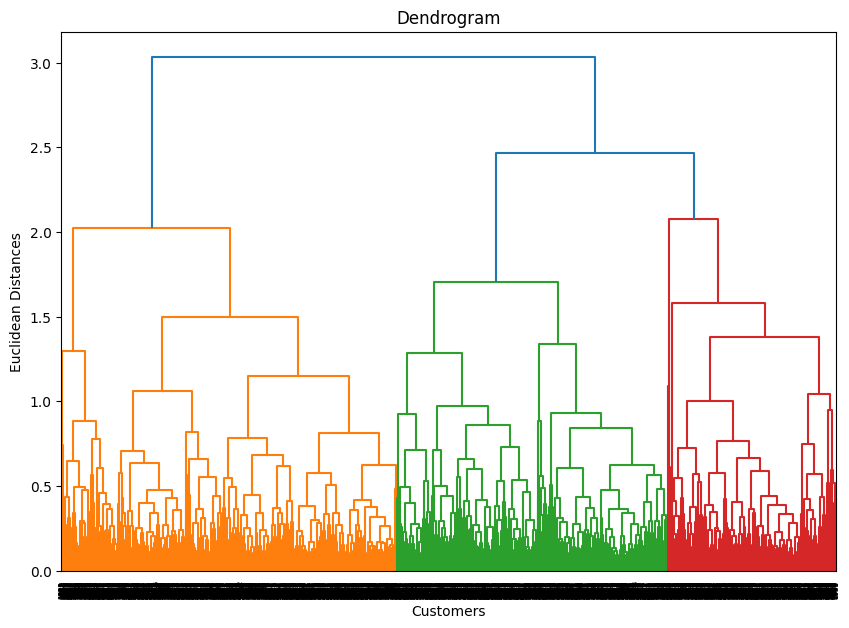

In [ ]:
plt.figure(figsize = (10,7))
dendrogram(linkage(RFM_modeling, method = 'complete'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

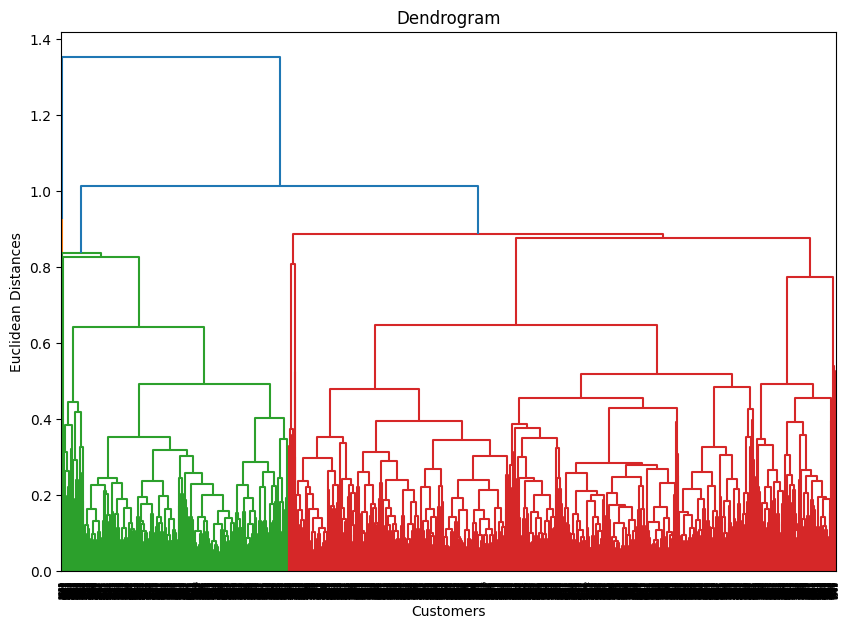

In [ ]:
plt.figure(figsize = (10,7))
dendrogram(linkage(RFM_modeling, method = 'average'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

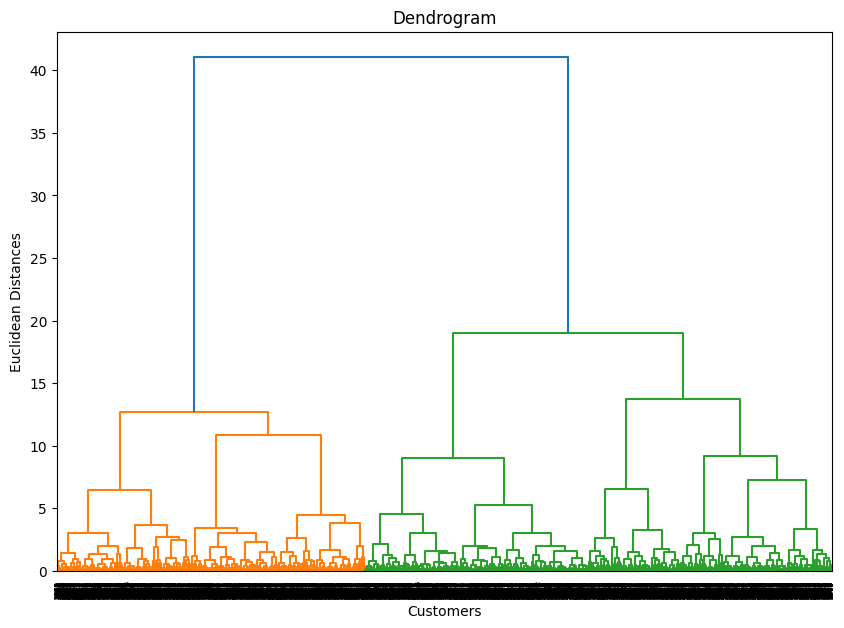

In [ ]:
plt.figure(figsize = (10,7))
dendrogram(linkage(RFM_modeling, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

We datermine Number of Clusters based on the longest verticle lines we can get without them breaking.
* We will be using ward linkage with 2 clusters for clustering.

In [ ]:
HRC = AgglomerativeClustering(n_clusters=2, affinity= 'euclidean', linkage='ward')
# Fitting and pridicting the input data
HRC_pred=HRC.fit_predict(RFM_modeling)
silhouette_score(RFM_modeling,HRC_pred)

0.4196489960363587

In [ ]:
HRC_df = pd.DataFrame(RFM_DF, columns=['Recency','Frequency','Monetary'])
HRC_df['Group'] = HRC_pred
HRC_df.head()

,Recency,Frequency,Monetary,Group
0,325,1,77183.60,1
1,2,182,4310.00,0
2,75,31,1797.24,0
3,18,73,1757.55,0
4,310,17,334.40,1


In [ ]:
fig = px.scatter_3d(HRC_df, x = 'Recency' ,y =  'Frequency',z = 'Monetary',
              color='Group')
fig.show()

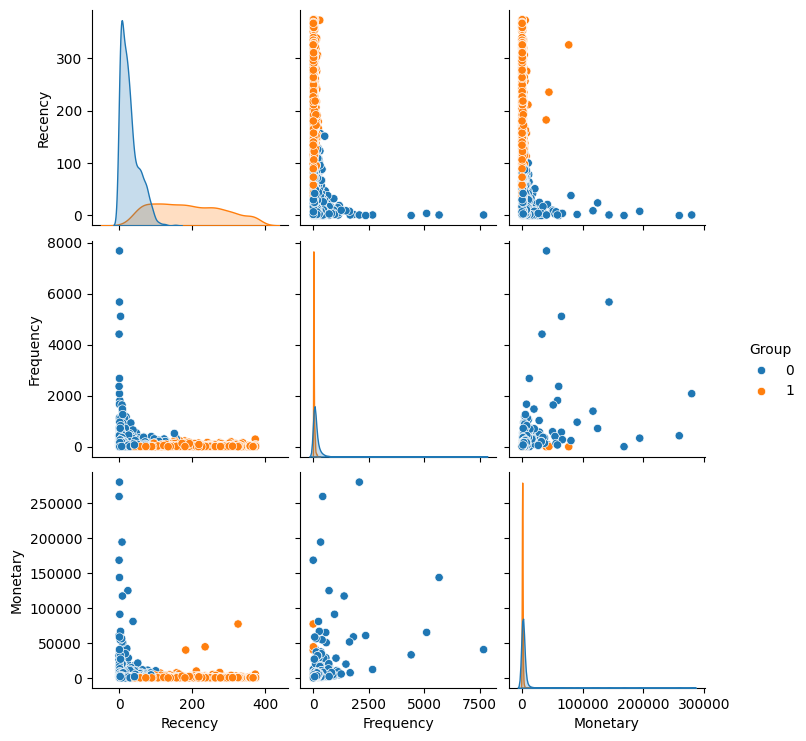

In [ ]:
sns.pairplot(HRC_df,hue= 'Group')

<Axes: xlabel='Group', ylabel='Recency'>

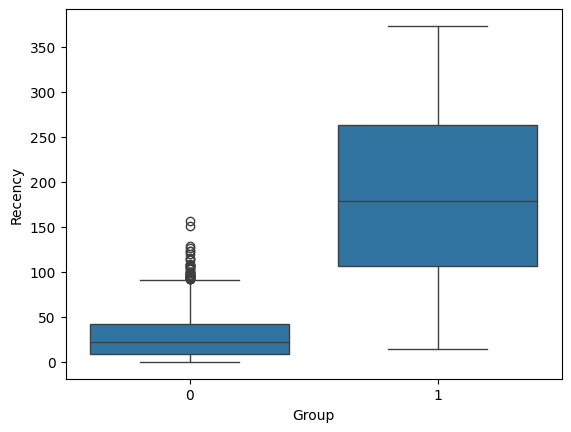

In [ ]:
sns.boxplot(y = HRC_df['Recency'] ,x = HRC_df['Group'])

(0.0, 1000.0)

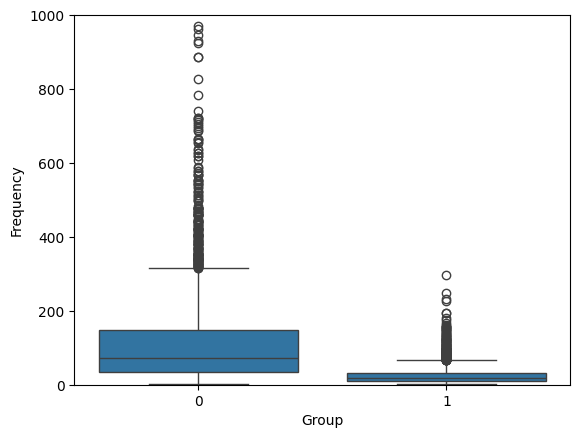

In [ ]:
sns.boxplot(y = HRC_df['Frequency'] ,x = HRC_df['Group'])
plt.ylim(0,1000)

(0.0, 15000.0)

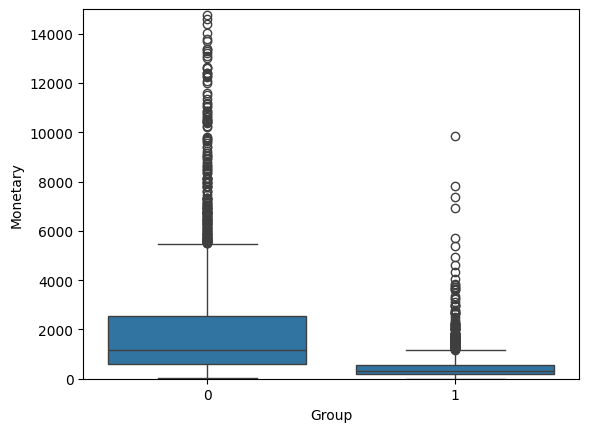

In [ ]:
sns.boxplot(y = HRC_df['Monetary'] ,x = HRC_df['Group'])
plt.ylim(0,15000)

* Group 0 - Active Customers (The Customers who uses the store for making purchases)
* Group 1 - InActive Customers (The Customers who no longer use the store)

## **Summery**

K-Means Clustering with 3 Clusters( silhoutte score = 0.357)

* Group 0 -Lost Customer (Customer who haven't made any purchase for a long time)
* Group 1 - Loyal Customers (Cutomers who frequently make purchases from the company and generaly buy the big ticket items)
* group 2 - Drifting Customers (Customers who moderatly make a purchase from the store)

Hierarchical Clustering with 2 Clusters ( silhoutte score = 0.419)

* Group 0 -Are customers with Low rececny High frequency and High Monetray. (These are value customers, they are very frequent and have
* Group 1 - Are customers with High rececny low frequency and low Monetray value. (these are lost customers which havent been active for a long time these contributers are not frequent and dont contributed much monetarly)


>We Will Go With 3 clusters because if we take 2 clusters. one of it(Active Customers)  is further devided into 2 Clusters(Loyal and Drifting).

>Furthermore The Store must focus on Group 2 from the K-means Model as these customer are not frequent which can be because of the competetion faced by other stores.